In [1]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
try:
    connexion = sqlite3.connect("IMDB.db")
    c = connexion.cursor()
except:
    print("no db connexion")
    

with connexion:
    c.execute("UPDATE movies SET public = 'Tous publics' WHERE public = 'Tous Public';")
    print("ok")

ok


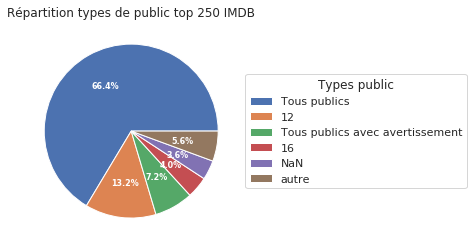

In [102]:
nb_other = 0
list_nb_movies = []
list_types_movies = []
with connexion:
    c.execute(f"SELECT public, COUNT(*) AS nb_movies FROM movies group by public order by nb_movies desc;")
    result = c.fetchall()
    for element in result:
        if element[1]<9:
            nb_other += element[1]
        else:
            list_nb_movies.append(element[1])
            list_types_movies.append(element[0])
    list_nb_movies.append(nb_other)
    list_types_movies.append('autre')    
    
#visualisation
fig, ax = plt.subplots(figsize=(6, 4), subplot_kw=dict(aspect="equal"))

recipe = list_types_movies

data = list_nb_movies
ingredients = list_types_movies


def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Types public",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Répartition types de public top 250 IMDB")

plt.show()

In [103]:
df = pd.read_sql("SELECT * FROM movies;", connexion)
dftempo = df = df.drop(['synopsis', 'img'], axis = 1)
df
dftempo = dftempo.drop(['year'], axis = 1)

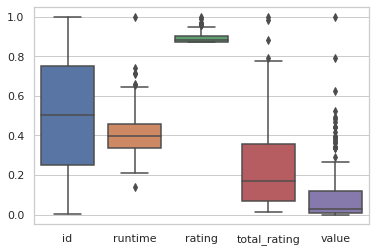

In [104]:
for i in ['id','runtime','rating','total_rating','value']:
    id_list = list(df[i])
    id_list = [i/max(id_list) for i in id_list]
    dftempo[i] = id_list

sns.boxplot(data=dftempo)

In [105]:

dftempo

,id,title,public,runtime,rating,total_rating,value
0,0.004,Les Évadés,Tous publics,0.442368,1.000000,1.000000,0.033016
1,0.008,Le parrain,12,0.545171,0.989247,0.693072,0.157240
2,0.012,The Dark Knight : Le Chevalier noir,Tous publics,0.473520,0.967742,0.984534,0.623111
3,0.016,"Le parrain, 2ème partie",Tous publics,0.629283,0.967742,0.482104,0.066754
4,0.020,12 Hommes en colère,Tous publics,0.299065,0.967742,0.295198,0.005079
...,...,...,...,...,...,...,...
245,0.984,Mr. Smith au sénat,(Banned),0.401869,0.870968,0.045467,0.011184
246,0.988,Autant en emporte le vent,Tous publics,0.741433,0.870968,0.123247,0.231462
247,0.992,New York - Miami,Tous publics,0.327103,0.870968,0.040144,0.005079
248,0.996,La passion de Jeanne d'Arc,Not Rated,0.342679,0.870968,0.020542,0.000023


In [3]:
dftempo = df
dftempo = dftempo.drop(['year'], axis = 1)


for i in ['id','runtime','rating','total_rating','value']:
    id_list = list(df[i])
    id_list = [((i/min(id_list))-1)/((max(id_list)/min(id_list))-1) for i in id_list]
    dftempo[i] = id_list

sns.boxplot(data=dftempo)

NameError: name 'df' is not defined

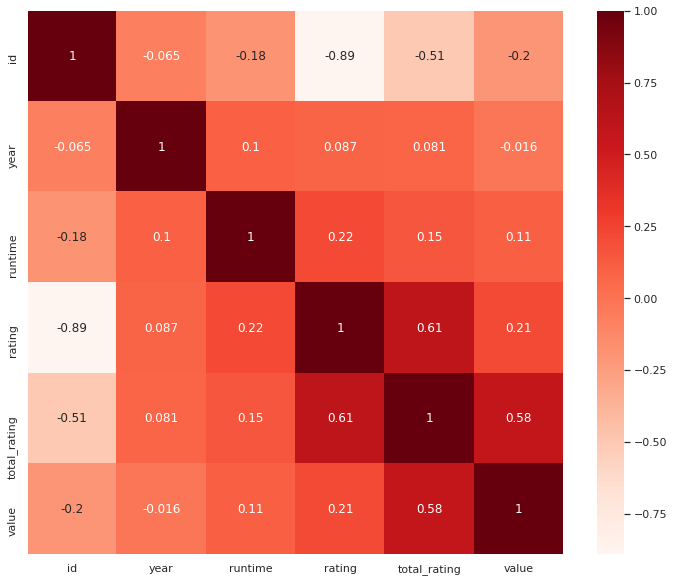

In [107]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


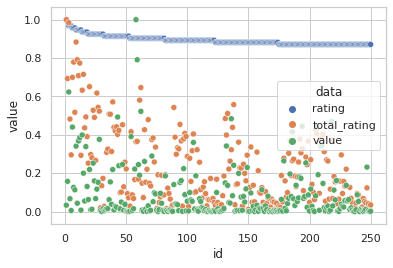

In [108]:
df = pd.read_sql("SELECT * FROM movies;", connexion)
df = df.drop(['synopsis', 'img'], axis = 1)

df2 = pd.DataFrame(columns=['id', 'data', 'value'])
df2['value'] = df2['value'].astype('float64')

for a,b in zip(list(df['id']),list(df['rating'])):
    df2=df2.append({'id' : float(a) , 'data' :'rating', 'value' : b/max(list(df['rating']))} , ignore_index=True)
    
for a,b in zip(list(df['id']),list(df['total_rating'])):
    df2=df2.append({'id' : float(a) , 'data' :'total_rating', 'value' : b/max(list(df['total_rating']))} , ignore_index=True)
    
for a,b in zip(list(df['id']),list(df['value'])):
    df2=df2.append({'id' : int(a) , 'data' :'value', 'value' : b/max(list(df['value']))} , ignore_index=True)
    
df2['value'] = df2['value'].astype('float64')

sns.scatterplot(data=df2, x="id", y="value", hue="data")


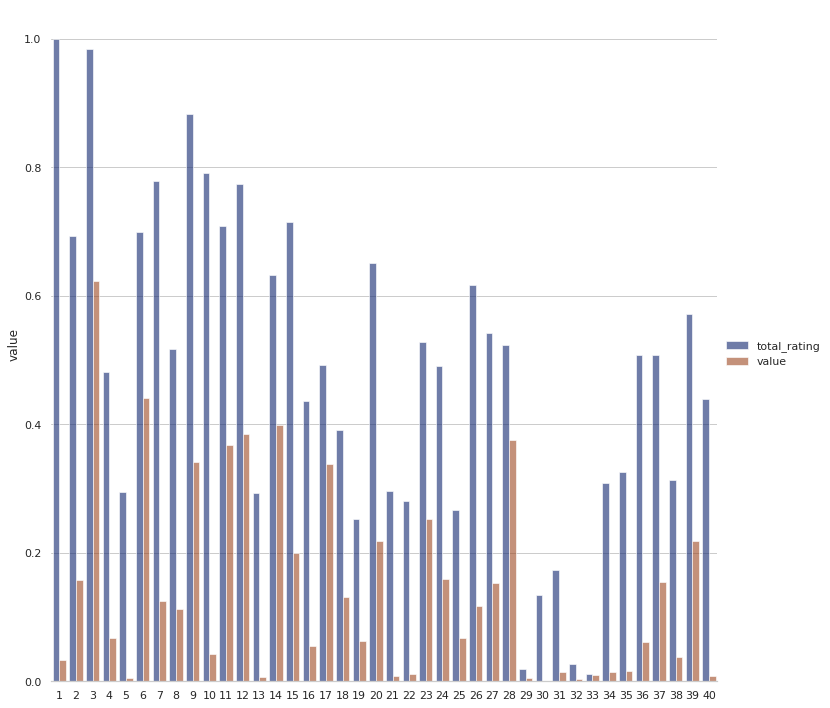

In [109]:
import seaborn as sns

df3 = pd.DataFrame(columns=['id', 'data', 'value'])
df3['value'] = df3['value'].astype('float64')

# for a,b in zip(list(df['id'][:40]),list(df['rating'][:40])):
#     df3=df3.append({'id' : int(a) , 'data' :'rating', 'value' : b/max(list(df['rating']))} , ignore_index=True)
    
for a,b in zip(list(df['id'][:40]),list(df['total_rating'][:40])):
    df3=df3.append({'id' : int(a) , 'data' :'total_rating', 'value' : b/max(list(df['total_rating']))} , ignore_index=True)
    
for a,b in zip(list(df['id'][:40]),list(df['value'][:40])):
    df3=df3.append({'id' : int(a) , 'data' :'value', 'value' : b/max(list(df['value']))} , ignore_index=True)
    
df3['value'] = df3['value'].astype('float64')


sns.set_theme(style="whitegrid")


# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df3, kind="bar",
    x="id", y="value", hue="data",
    ci="sd", palette="dark", alpha=.6, height=10
)
g.despine(left=True)
g.set_axis_labels("", "value")
g.legend.set_title("")



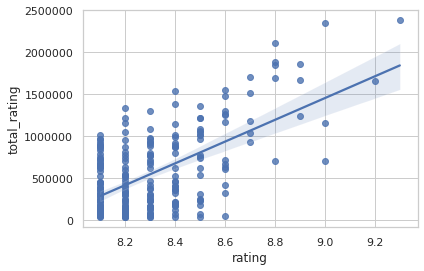

In [110]:
df2 = pd.DataFrame(columns=['rating', 'data', 'total_rating'])

for a,b in zip(list(df['rating']),list(df['total_rating'])):
    df2=df2.append({'rating' : float(a) , 'data' :'total_rating', 'total_rating' : b} , ignore_index=True)

df2['total_rating'] = df2['total_rating'].astype('float64')
df2['rating'] = df2['rating'].astype('float64')
ax = sns.regplot(x="rating", y="total_rating", data=df2)

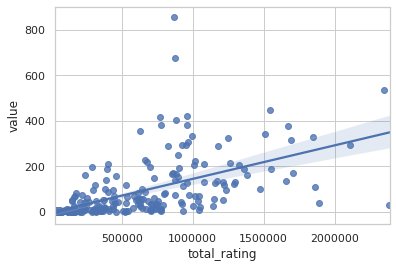

In [111]:
df2 = pd.DataFrame(columns=['total_rating', 'data', 'value'])

for a,b in zip(list(df['total_rating']),list(df['value'])):
    df2=df2.append({'total_rating' : float(a) , 'data' :'total_rating', 'value' : b} , ignore_index=True)

df2['value'] = df2['value'].astype('float64')
df2['total_rating'] = df2['total_rating'].astype('float64')
ax = sns.regplot(x="total_rating", y="value", data=df2)

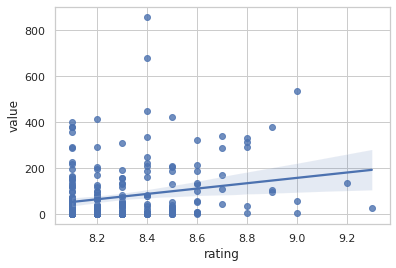

In [112]:
df2 = pd.DataFrame(columns=['rating', 'data', 'value'])

for a,b in zip(list(df['rating']),list(df['value'])):
    df2=df2.append({'rating' : float(a) , 'data' :'total_rating', 'value' : b} , ignore_index=True)

df2['value'] = df2['value'].astype('float64')
df2['rating'] = df2['rating'].astype('float64')
ax = sns.regplot(x="rating", y="value", data=df2)

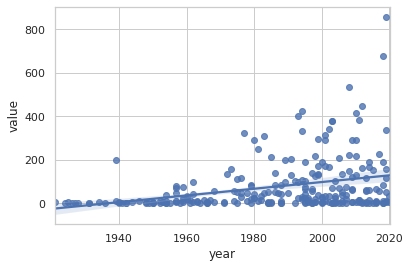

In [113]:

df = pd.read_sql("SELECT * FROM movies WHERE year != -1;", connexion)
dftempo = df = df.drop(['synopsis', 'img'], axis = 1)
df


df2 = pd.DataFrame(columns=['value','year'])

for a,b in zip(list(df['value']),list(df['year'])):
    df2=df2.append({'value' : float(a) , 'year' : b} , ignore_index=True)

df2['value'] = df2['value'].astype('float64')
df2['year'] = df2['year'].astype('int')
ax = sns.regplot(x="year", y="value", data=df2)

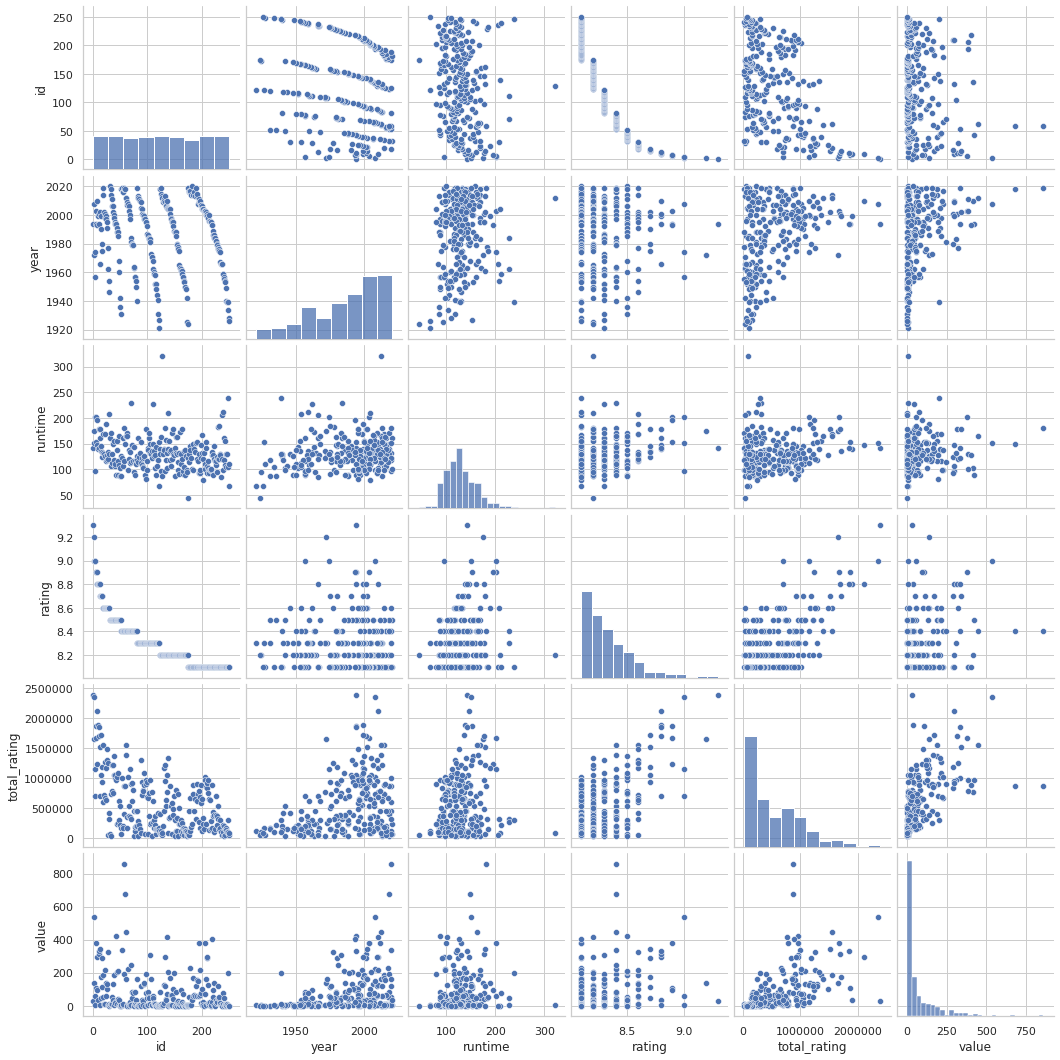

In [115]:
sns.pairplot(df, height=2.5)

In [119]:
for i in range(0,100):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
